In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as ss 
from SUITPy import flatmap
import os
import connectivity.constants as const
from connectivity.data import Dataset
import connectivity.model as model
import connectivity.data as cdata
import connectivity.run as run
import connectivity.visualize as vis
import connectivity.figures as fig
import connectivity.io as cio
import itertools
import nibabel as nib
import h5py
import deepdish as dd



## Raw evaluation maps


In [24]:
def eval_map_names(cortex,methods=['ridge','WTA','lasso']): 
    df = vis.get_summary('eval',exps='sc2',summary_name='weighted_all',
                method=methods)
    a = df.name.str.contains(cortex)
    names = np.unique(df.name[a])
    return names

def show_maps(cortex):
    names = eval_map_names(cortex)
    dirs = const.Dirs(exp_name='sc2')
    for m in range(3): 
        ax = plt.subplot(2,3,m+1)
        # plot 
        filename = os.path.join(dirs.conn_eval_dir, names[m],
                            'group_R_vox.func.gii')
        flatmap.plot(filename,cscale=[0,0.5])
        ax.set_title(names[m])
        # plot noiseceilint 
        ax = plt.subplot(2,3,m+4)
        # plot 
        filename = os.path.join(dirs.conn_eval_dir, names[m],
                            'group_noise_Y_R_vox.func.gii')
        flatmap.plot(filename,cscale=[0,0.5])
        pass
    pass 

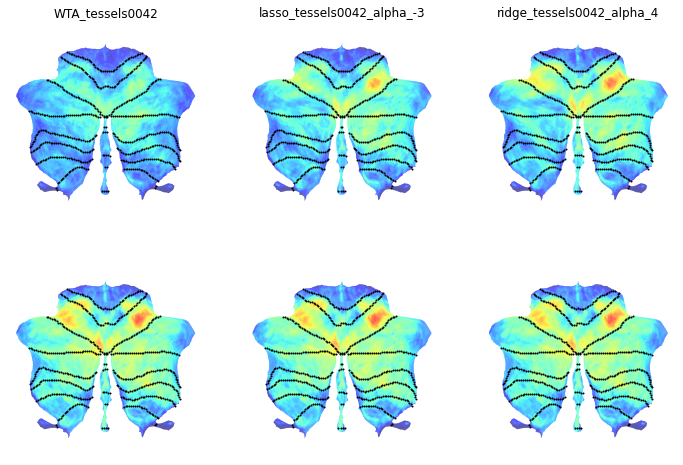

In [13]:
show_maps('tessels0042')

## Show difference between Ridge and WTA model mapwise

In [25]:
def diff_maps(cortex):
    plt.figure(figsize=(10,10))
    names = eval_map_names(cortex,methods=['WTA','ridge'])
    dirs = const.Dirs(exp_name='sc2')
    vmap=[]
    vceil=[]
    VMAP = np.empty((2,28935))
    VCEIL = np.empty((2,28935))
    for m in range(2): 
        filename = os.path.join(dirs.conn_eval_dir, names[m],
                            'group_R_vox.func.gii')
        vmap.append(nib.load(filename))
        VMAP[m,:]=vmap[m].agg_data()
        filename = os.path.join(dirs.conn_eval_dir, names[m],
                            'group_noiseceiling_XY_R_vox.func.gii')
        vceil.append(nib.load(filename))
        VCEIL[m,:]=vceil[m].agg_data()

    ax = plt.subplot(3,3,1)
    flatmap.plot(VMAP[0],cscale=[0,0.5])
    ax.set_title(names[0])
    ax.set_ylabel('Correlation(R)')
    ax = plt.subplot(3,3,2)
    flatmap.plot(VMAP[1],cscale=[0,0.5])
    ax.set_title(names[1])
    ax = plt.subplot(3,3,3)    
    flatmap.plot(VMAP[1]-VMAP[0],cscale=[-0.2,0.2])
    ax.set_title('Ridge-WTA')
    ax = plt.subplot(3,3,4)    
    flatmap.plot(VCEIL[0],cscale=[0,0.5])
    ax.set_ylabel('Noiseceiling XY')
    ax = plt.subplot(3,3,5)    
    flatmap.plot(VCEIL[1],cscale=[0,0.5])
    ax = plt.subplot(3,3,6)    
    flatmap.plot(VCEIL[1]-VCEIL[0],cscale=[-0.2,0.2])
    ax = plt.subplot(3,3,7)    
    flatmap.plot(VMAP[0]/VCEIL[0],cscale=[0,0.7])
    ax.set_ylabel('R/Noiseceiling')
    ax = plt.subplot(3,3,8)    
    flatmap.plot(VMAP[1]/VCEIL[1],cscale=[0,0.7])
    ax = plt.subplot(3,3,9)    
    flatmap.plot(VMAP[1]/VCEIL[1]-VMAP[0]/VCEIL[0],cscale=[-0.2,0.2])
    pass

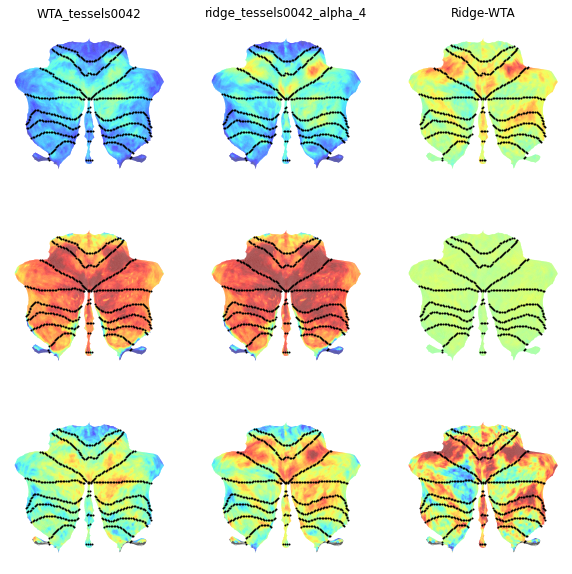

In [26]:
diff_maps('tessels0042')

First row shows the evaluation R for weighted - all evaluation. 
The third column the difference between methods. 
Second row is the model noise ceiling (XY) - and difference 
Finally the last row is the normalized evaluation (divided by noise ceiling) performance. 

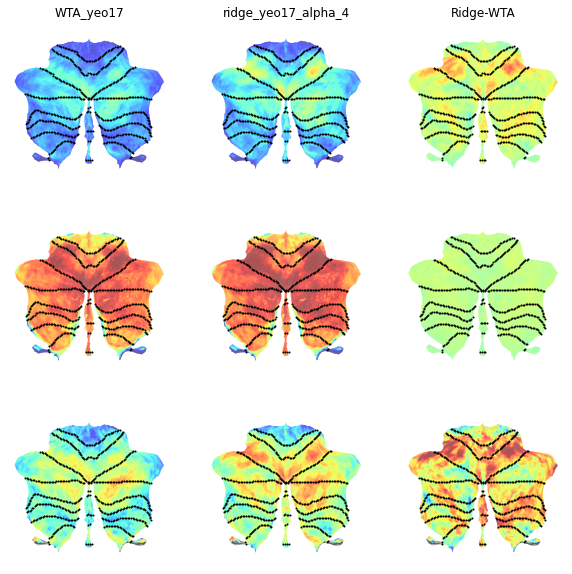

In [27]:
diff_maps('yeo17')

This Figure shows the same plot for the Yeo17 models... 